<a href="https://colab.research.google.com/github/BAEK-SEUNGYUN/modu_deep/blob/main/modu_deep_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오차 수정하기 : 경사 하강법

그래프에서 오차를 비교하여 가장 작은 방향으로 이동시키는 방법

미분의 기울기를 이용하는 **경사 하강법**

반복적으로 기울기 a 를 변화시켜서 m의 값을 찾아내는 방법이다.

최솟값 m에서의 순간 기울기를 찾는 것이 목표
그 기울기가 0 -> 미분 값이 0인 지점을 찾는 것

찾기 위한 과정
1. a1에서 미분을 구한다.
2. 구해진 기울기의 반대 방향으로 얼마간 이동시킨 a2에서 미분을 구한다.
3. 미분 값이 0이 아니면 위 과정을 반복



## 학습률
기울기의 부호를 바꿔 이동시킬 때 적절한 거리를 찾지 못해 멀리 이동시키면 a 값이 한 점으로 모이지 않고 위로 치솟아 버린다.

이때 이동 거리를 정해 주는 것이 **학습률**

학습률의 값을 적절히 바꾸면서 최적의 학습룰을 찾는 것은 중요한 최적화 과정

##파이썬 코드로 알아보는 경사 하강법

y_pred = a * x_data + b  -> 오차 함수인 y = ax + b 를 정의한 부분


error = y_data - y_pred  -> 실제값 - 예측값, 즉 오차를 구하는 식

평균 제곱 오차를 a로 미분한 결과

a_diff = -(2 / len(x_data)) * sum(x_data *(error))

평균 제곱 오차를 b로 미분한 결과

b_diff = -(2 / len(x_data)) * sum(error)

==========================================

여기에 학습률을 곱해 기존의 a 값과 b 값을 업데이트해 준다.

a = a - lr * a_diff

b = b - lr * b_diff

In [25]:
# 실습 코드

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# 공부 시간 x 와 성적 y 리스트 만들기

data = [[2,81],[4,93],[6,91],[8,97]]

x = [i[0] for i in data]
y = [i[1] for i in data]

print(type(x))
print(x, y)

<class 'list'>
[2, 4, 6, 8] [81, 93, 91, 97]


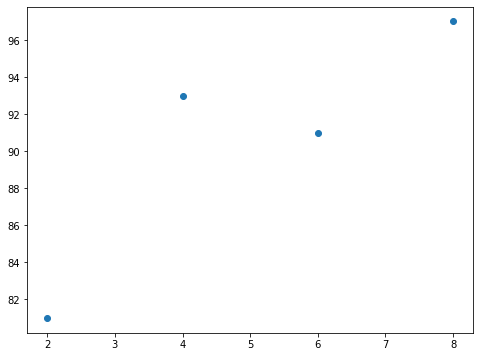

In [27]:
# 그래프로 나타내기


plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.show()

In [28]:
# 리스트로 되어 있는 x 와 y 값을 넘파이 배열로 바꾸기
# 인덱스를 주어 하나씩 불러와 계산이 가능하게 하기 위함

x_data = np.array(x)
y_data = np.array(y)

print(type(x_data))
print(x_data, y_data)

<class 'numpy.ndarray'>
[2 4 6 8] [81 93 91 97]


In [29]:
# 기울기 a 와 절편 b의 값 초기화
a = 0
b = 0

In [30]:
# 학습률 정하기
lr = 0.03

In [31]:
# 몇 번 반복될지 설정
epochs = 2001

In [32]:
# 경사 하강법 시작
for i in range(epochs):           # 에포크 수만큼 반복
  y_pred = a * x_data + b         # y 를 구하는 식 세우기
  error = y_data - y_pred         # 오차를 구하는 식

  a_diff = -(2/len(x_data)) * sum(x_data * (error))
  b_diff = -(2/len(x_data)) * sum(error)

  a = a - lr * a_diff
  b = b - lr * b_diff

  if i < 10:
    print(f"epoch = {i}, 기울기 = {a}, 절편 = {b}")

  if i % 100 == 0:
    print(f"epoch = {i}, 기울기 = {a}, 절편 = {b}")



epoch = 0, 기울기 = 27.84, 절편 = 5.43
epoch = 0, 기울기 = 27.84, 절편 = 5.43
epoch = 1, 기울기 = 3.939, 절편 = 2.1822
epoch = 2, 기울기 = 24.034139999999997, 절편 = 6.299568
epoch = 3, 기울기 = 6.722817600000006, 절편 = 4.141351920000001
epoch = 4, 기울기 = 21.219340343999995, 절편 = 7.306025524799999
epoch = 5, 기울기 = 8.672720067360004, 절편 = 5.931861890112001
epoch = 6, 기울기 = 19.122265379078396, 절편 = 8.404134156497278
epoch = 7, 기울기 = 10.0209474497881, 절편 = 7.5932064933839225
epoch = 8, 기울기 = 17.545280092154343, 절편 = 9.561329868844457
epoch = 9, 기울기 = 10.935376965623188, 절편 = 9.154066049067486
epoch = 100, 기울기 = 7.073858435872394, 절편 = 50.51166161138297
epoch = 200, 기울기 = 4.095999380762421, 절편 = 68.28224379060177
epoch = 300, 기울기 = 2.9756829100119027, 절편 = 74.96781336233505
epoch = 400, 기울기 = 2.5542024233262106, 절편 = 77.48302865233052
epoch = 500, 기울기 = 2.3956349066513707, 절편 = 78.42929177728175
epoch = 600, 기울기 = 2.3359793398132864, 절편 = 78.78529068727728
epoch = 700, 기울기 = 2.313535987420573, 절편 = 78.919223016009

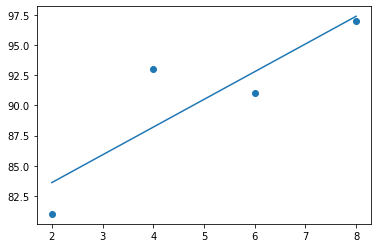

In [23]:
# 앞서 구한 기울기와 절편을 이용해 그래프를 다시 그리기

y_pred = a * x_data + b

plt.scatter(x,y)
plt.plot([min(x_data), max(x_data)],[min(y_pred), max(y_pred)])
plt.show()

기울기 a 가 2.3, y절편 b의 값이 79 에 수렴하는 것을 알 수 있다.

이는 앞서 최소 제곱법을 통해 미리 확인한 결과와 같다.

최소 제곱버을 통해 알 수 있는데 경사 하강법은 왜 쓸까??

x 가 여러개인 **다중 선형 회귀** 에서도  사용하기 때문이다.

# 다중 선형 회귀

학생들의 공부시간과 성적 데이터를 보고 기울기 a 와 y절편 b를 구했다.

하지만 그럼에도 실제값과 예측값의 차이는 있었다.

4시간 공부한 친구는 88점을 예측했는데 실제로는 93점이었고, 6시간 공부한 친구는 93점을 받을 것으로 예측했지만 91점이었다.

공부한 시간 이외의 다른 요소가 성적에 영향을 끼쳤기 때문이다. -> x 의 갯수가 증가

더 정확한 예측을 하려면 추가 정보를 입력해야 하며, 변수의 개수를 늘려 다중 선형 회귀를 만들어 주여야 한다.

In [33]:
data = [[2,0,81], [4,4,93],[6,2,91],[8,3,97]]

x1 = [i[0] for i in data]     # 학생의 공부한 시간
x2 = [i[1] for i in data]     # 과외 수업 횟수 -> 새로 추가된 x
y = [i[2] for i in data]      # 성적

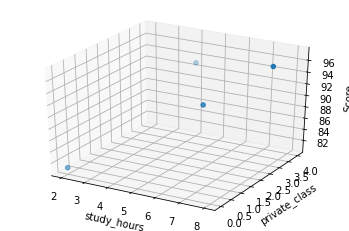

In [39]:
# x1, x2, y 세 개의 축이 필요하므로 3D 그래프를 그려주는 라이브러리를 가져옴

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection = '3d')  # 그래프 유형 정하기
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.scatter(x1,x2,y)
plt.show()

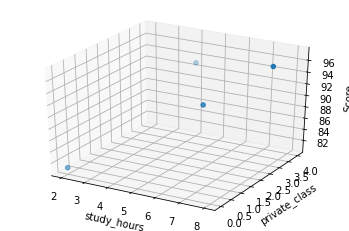

In [5]:
# 실습 코드

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# 공부 시간 x 와 성적 y 리스트 만들기
data = [[2,0,81], [4,4,93],[6,2,91],[8,3,97]]

x1 = [i[0] for i in data]     # 학생의 공부한 시간
x2 = [i[1] for i in data]     # 과외 수업 횟수 -> 새로 추가된 x
y = [i[2] for i in data]      # 성적

# 그래프로 확인
ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
# ax.dist = 11
ax.scatter(x1,x2,y)
plt.show()

In [8]:
# 리스트로 되어있는 x 와 y 값을 넘파이 배열로 바꾸기

x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

In [9]:
# 기울기 a 와 절편 b의 값 초기화
a1 = 0
a2 = 0
b = 0

# 학습률 
lr = 0.05

# 몇번 반복할지 설정
epochs = 2001

In [11]:
# 경사하강법 시작

for i in range(epochs):
  y_pred = a1 * x1_data + a2 * x2_data + b    # y 를 구하는 식
  error = y_data - y_pred                     # 오차를 구하는 식
  # 오차 함수를 a1, a2, b으로 미분한 값
  a1_diff = -(1/len(x1_data)) * sum(x1_data * (error))
  a2_diff = -(1/len(x2_data)) * sum(x2_data * (error))
  b_diff = -(1/len(y_data) * sum(error))

  a1 = a1 - lr * a1_diff
  a2 = a2 - lr * a2_diff
  b = b -lr * b_diff

  if i % 100 == 0:
    print(f'epochs = {i}, 기울기1 = {a1}, 기울기2 = {a2}, 절편 = {b}')

epochs = 0, 기울기1 = 23.200000000000003, 기울기2 = 10.5625, 절편 = 4.525
epochs = 100, 기울기1 = 6.434805446608685, 기울기2 = 3.98925524892891, 절편 = 43.97569356791496
epochs = 200, 기울기1 = 3.7255348759847924, 기울기2 = 3.0541408134809784, 절편 = 62.576629969168025
epochs = 300, 기울기1 = 2.503714679287745, 기울기2 = 2.6322742530634486, 절편 = 70.96564181265175
epochs = 400, 기울기1 = 1.952674645725859, 기울기2 = 2.4420125981800993, 절편 = 74.74908051776274
epochs = 500, 기울기1 = 1.7041559609856545, 기울기2 = 2.356204719590433, 절편 = 76.45540883097016
epochs = 600, 기울기1 = 1.592074201194008, 기울기2 = 2.31750542401674, 절편 = 77.22496175342586
epochs = 700, 기울기1 = 1.5415254028566499, 기울기2 = 2.300052067722291, 절편 = 77.57202960424704
epochs = 800, 기울기1 = 1.5187279287796718, 기울기2 = 2.292180615763661, 절편 = 77.7285569717077
epochs = 900, 기울기1 = 1.5084462832928398, 기울기2 = 2.28863059622062, 절편 = 77.79915070923249
epochs = 1000, 기울기1 = 1.5038092680884374, 기울기2 = 2.2870295397926297, 절편 = 77.83098843741102
epochs = 1100, 기울기1 = 1.501717977347